# <font color='green'>Endangered U.S. Names of Our Century</font>

### We might be the last generation with common names from the 1900s!

##### Data obtained from the Social Security Administration's Baby Names from Social Security Card Applications - National Data (https://www.ssa.gov/data/)

In [5]:
#%matplotlib inline
import matplotlib as mpl # for .StrMethodFormatter to add ',' to tick labels
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # for .DateFormatter to modify tick date format
import pandas as pd
import numpy as np
import os

In [2]:
# read-in smaller 5-year interval data from 1880-2019 file and format
df_Names = pd.read_csv('5year.csv') 
df_Names['Year'] = pd.to_datetime(df_Names['Year'], format = "%Y") 
df_Names.set_index('Year', inplace = True)

In [9]:
# Read-in full data from the directory containing the TXT files
txt_folder = 'C:/Users/dougr/CTBA/M3/Baby Names'

# List to store individual DataFrames
dataframes = []

# Iterate through each file in the folder
for file in os.listdir(txt_folder):
    if file.startswith("yob") and file.endswith(".txt"):
        # Extract year from the filename
        year = int(file[3:7])
        
        # Read TXT file into a DataFrame
        df = pd.read_csv(os.path.join(txt_folder, file), names=['Name', 'Gender', 'Records'])
        
        # Add a 'Year' column
        df['Year'] = year
        
        # Append DataFrame to the list
        dataframes.append(df)

# Check if there are any DataFrames to concatenate
if dataframes:
    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv('C:/Users/dougr/CTBA/M3/combined_name_data.csv', index=False)
else:
    print("No valid TXT files found in the specified folder.")

# read in file and format
df_Names = pd.read_csv('C:/Users/dougr/CTBA/M3/combined_name_data.csv') 
df_Names['Year'] = pd.to_datetime(df_Names['Year'], format = "%Y") 
df_Names.set_index('Year', inplace = True)

In [22]:
def name_gender_query():
    YourName = input("Enter the first name you are interested in? ")
    YourGender = input("Enter if male or female (M or F)? ")
    
    cond_name = df_Names["Name"] == YourName
    cond_gender = df_Names["Gender"] == YourGender
    df_Names[cond_name & cond_gender]['Records']
    MaxRec = max(df_Names[cond_name & cond_gender]['Records'])
    cond_MaxRec = df_Names['Records'] == max(df_Names[cond_name & cond_gender]['Records'])

    fig1, ax1 = plt.subplots()
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    fig1.set_size_inches(12, 6)
    fig1.suptitle(f'{YourName}\'s ({YourGender}) Popularity Over Time (1880-2022)', c = 'k', fontsize = '20')
    
    ax1.plot(df_Names[cond_name & cond_gender].index, df_Names[cond_name & cond_gender]['Records'], label = 'Records', c = 'navy')
    
    ax1.xaxis.set_label_text('Year', fontsize = '12')
    ax1.yaxis.set_label_text('Total Records', fontsize = '12')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}' if isinstance(MaxRec, int) else '{x:,.2f}'))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation = 60, ha = "right", rotation_mode = "anchor")
    
    ax1.set_xticks(df_Names[cond_name & cond_gender].index[ : :2])
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    max_rec_year = df_Names[cond_MaxRec].index[0]  # Choose the first year if there are multiple
    ax1.axvline(x=max_rec_year, label = 'Highest Recorded Year', linewidth = 1, linestyle = 'dotted', c = 'gray')
    plt.annotate(f'{MaxRec} ({max_rec_year.year})',
                 (max_rec_year, MaxRec),  # coordinates to position the label
                 textcoords = "offset points",  # how to position the text
                 xytext = (0, 10),  # distance from text to point
                 ha = 'center')
    
    ax1.legend(loc = 2)

### Interactive cell to provide the name and gender for the plot:

Enter the first name you are interested in?  Jessica
Enter if male or female (M or F)?  F


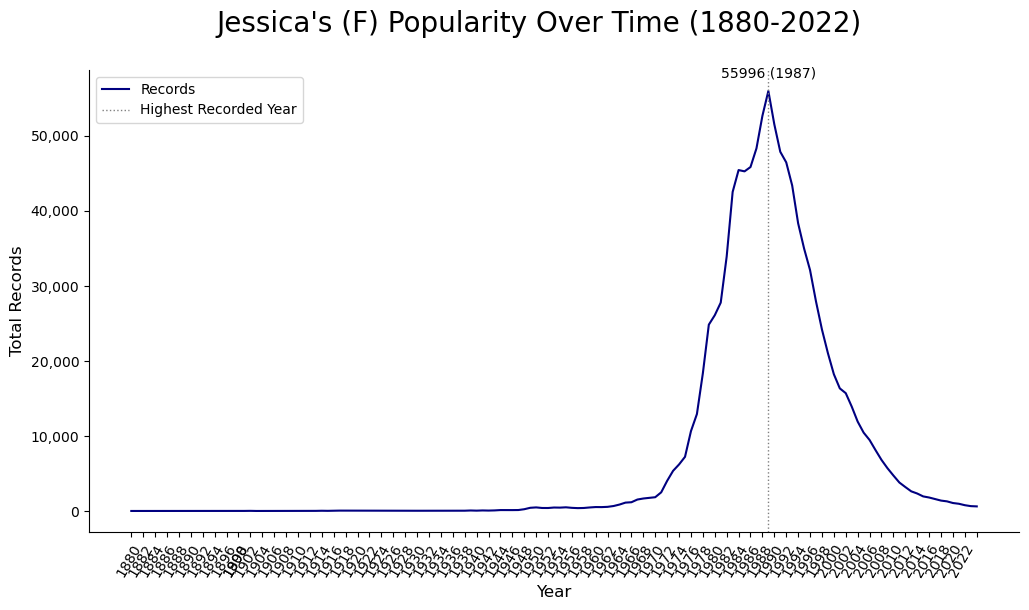

In [27]:
name_gender_query()